# Employee Attrition Exploratory Data Analysis 

In [1]:
#pip install pandas
#to install pandas or check if its already installed
#This allows us to perform data analysis in jupyter

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#numpy allows us to perform analysis on large data

In [3]:
data= pd.read_csv('/Users/dikshya/Desktop/Employeedata.csv') 
 #importdataset and data is the name given for dataframe.it can be any name like df

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employee_ID                14900 non-null  int64 
 1   Age                        14900 non-null  int64 
 2   Gender                     14900 non-null  object
 3   Years                      14900 non-null  int64 
 4   Role                       14900 non-null  object
 5   Income                     14900 non-null  int64 
 6   Worklife_Balance           14900 non-null  object
 7   Job_Satisfaction           14900 non-null  object
 8   Performance _Rating        14900 non-null  object
 9    Promotions                14900 non-null  int64 
 10  Overtime                   14900 non-null  object
 11   Home_Distance             14900 non-null  int64 
 12  Education                  14900 non-null  object
 13  Marital_Status             14900 non-null  object
 14  Depend

In [5]:
data = data.drop_duplicates()


In [6]:
data.describe() #returns the statistical summary of the dataframe 
#count, mean, median (or 50th percentile) standard variation, min-max, 

,Employee_ID,Age,Years,Income,Promotions,Home_Distance,Dependents,Company_Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


In [7]:
data.head()

,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [8]:
data.tail()

,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed
14899,73042,59,Female,48,Education,3774,Good,High,Below Average,1,...,4,Mid,Large,118,No,No,No,Good,Very High,Left


In [9]:
data.mean()

/var/folders/fj/ssdknt516wndwtjgqd804jx00000gn/T/ipykernel_67926/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Employee_ID       37339.022081
Age                  38.385235
Years                15.592416
Income             7287.306040
 Promotions           0.834362
 Home_Distance       49.927315
Dependents            1.659329
Company_Tenure       55.603624
dtype: float64

In [10]:
data.median()

/var/folders/fj/ssdknt516wndwtjgqd804jx00000gn/T/ipykernel_67926/4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Employee_ID       37433.0
Age                  38.0
Years                13.0
Income             7332.0
 Promotions           1.0
 Home_Distance       50.0
Dependents            1.0
Company_Tenure       56.0
dtype: float64

In [11]:
data.isnull()

,Employee_ID,Age,Gender,Years,Role,Income,Worklife_Balance,Job_Satisfaction,Performance _Rating,Promotions,...,Dependents,Job_Level,Company_ Size,Company_Tenure,Remote_Work,Leadership_Opportunities,Innovation _Opportunities,Company_Reputation,Employee_Recognition,Attrition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


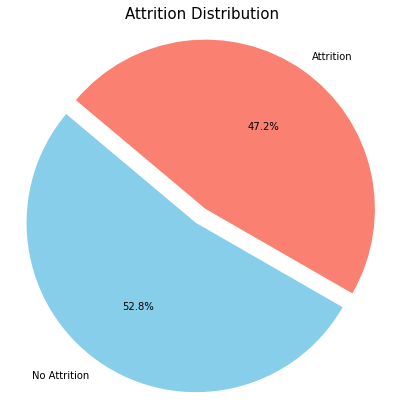

In [12]:
#To create Attrition Pie Chart
#Firstly count the attrition yes and no
Attrition_Count=data['Attrition'].value_counts()
labels = ['No Attrition', 'Attrition']
sizes = Attrition_Count.values
colors = ['skyblue', 'salmon']  # Colors for the pie slices

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Attrition Distribution', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


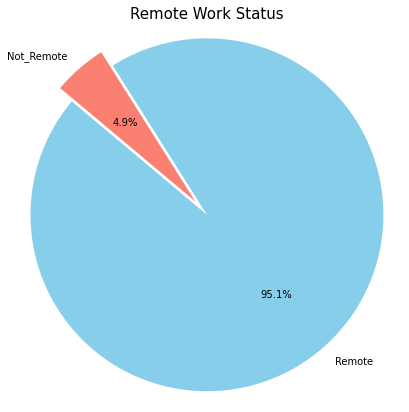

In [13]:
 #Pie to see Employee_RemoteworK   


#Firstly count the attrition yes and no
Remote_Work_count=data['Leadership_Opportunities'].value_counts()
labels = ['Remote', 'Not_Remote']
sizes = Remote_Work_count.values
colors = ['skyblue', 'salmon']  # Colors for the pie slices

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0, 0.1))
plt.title('Remote Work Status', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()



<AxesSubplot:xlabel='Role', ylabel='Income'>

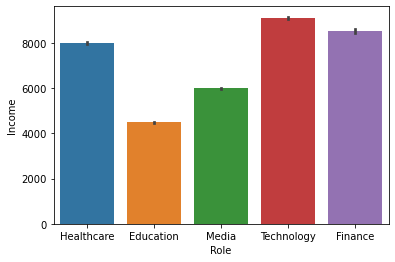

In [14]:
sns.barplot(x='Role',y='Income',data=data)

In [24]:

data.style.background_gradient(cmap='coolwarm', axis=None)
data.corr()



,Employee_ID,Age,Years,Income,Promotions,Home_Distance,Dependents,Company_Tenure
Employee_ID,1.000000,0.017748,0.006994,-0.010606,0.014348,0.003551,0.002005,-0.010541
Age,0.017748,1.000000,0.527232,-0.000879,0.002710,0.005195,0.006844,0.233444
Years,0.006994,0.527232,1.000000,-0.008806,0.005669,0.003360,0.006156,0.444186
Income,-0.010606,-0.000879,-0.008806,1.000000,0.002694,0.000520,-0.002768,-0.012999
Promotions,0.014348,0.002710,0.005669,0.002694,1.000000,-0.002674,-0.005089,0.010153
Home_Distance,0.003551,0.005195,0.003360,0.000520,-0.002674,1.000000,-0.007378,-0.006307
Dependents,0.002005,0.006844,0.006156,-0.002768,-0.005089,-0.007378,1.000000,-0.004300
Company_Tenure,-0.010541,0.233444,0.444186,-0.012999,0.010153,-0.006307,-0.004300,1.000000


In [25]:
correlation_matrix = data.corr()

# Apply gradient to the correlation matrix
correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None)

,Employee_ID,Age,Years,Income,Promotions,Home_Distance,Dependents,Company_Tenure
Employee_ID,1.000000,0.017748,0.006994,-0.010606,0.014348,0.003551,0.002005,-0.010541
Age,0.017748,1.000000,0.527232,-0.000879,0.002710,0.005195,0.006844,0.233444
Years,0.006994,0.527232,1.000000,-0.008806,0.005669,0.003360,0.006156,0.444186
Income,-0.010606,-0.000879,-0.008806,1.000000,0.002694,0.000520,-0.002768,-0.012999
Promotions,0.014348,0.002710,0.005669,0.002694,1.000000,-0.002674,-0.005089,0.010153
Home_Distance,0.003551,0.005195,0.003360,0.000520,-0.002674,1.000000,-0.007378,-0.006307
Dependents,0.002005,0.006844,0.006156,-0.002768,-0.005089,-0.007378,1.000000,-0.004300
Company_Tenure,-0.010541,0.233444,0.444186,-0.012999,0.010153,-0.006307,-0.004300,1.000000


<AxesSubplot:xlabel='Income'>

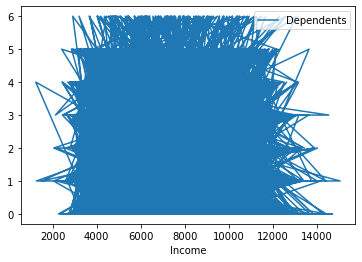

In [27]:
data.plot.line('Income','Dependents')

In [16]:
#Top  100 Highest Paid Employee and their role
Highest=data.sort_values('Income',ascending=False) 
Top_100 = Highest.head(100)
print(Top_100[['Employee_ID','Income','Role']])



       Employee_ID  Income        Role
14454        44059   15063     Finance
8643         62836   14707     Finance
12675         3283   14547     Finance
10392        44579   14433     Finance
1567         17091   14412  Technology
...            ...     ...         ...
9160         41237   12469  Technology
13178        62132   12467     Finance
9998         32164   12467     Finance
7587         19603   12464  Technology
10813        32573   12455  Technology

[100 rows x 3 columns]


In [17]:
#Top  100 Highest Paid Employee and their role
Lowest=data.sort_values('Income',ascending=True)
Low_100=Lowest.head(100)
print(Low_100[['Employee_ID','Income','Role']])

       Employee_ID  Income       Role
656          31139    1226    Finance
3403         42320    1253    Finance
13260        53264    1503  Education
280           1119    2030    Finance
7389         64764    2044  Education
...            ...     ...        ...
13760        61367    3018  Education
14434         2663    3020  Education
8228         73078    3022  Education
903           1519    3029  Education
11862        47179    3030  Education

[100 rows x 3 columns]


<AxesSubplot:xlabel='Role', ylabel='Income'>

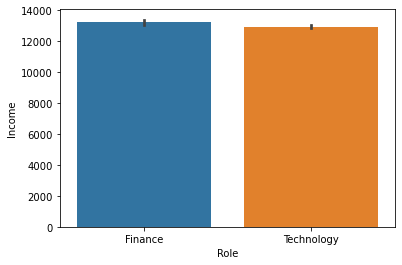

In [18]:
sns.barplot(x='Role',y='Income',data=Top_100)

<AxesSubplot:xlabel='Role', ylabel='Income'>

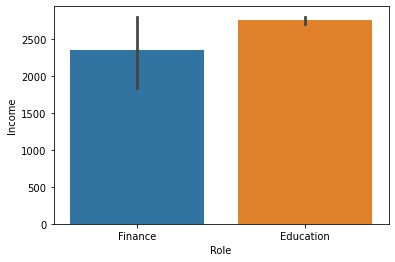

In [19]:
sns.barplot(x='Role',y='Income',data=Low_100)

In [20]:
#Change Categorical Columns Into Numerical

new_data = pd.get_dummies(data[['Attrition']])

print(new_data.to_string())

       Attrition_Left  Attrition_Stayed
0                   0                 1
1                   1                 0
2                   0                 1
3                   1                 0
4                   0                 1
5                   0                 1
6                   0                 1
7                   1                 0
8                   0                 1
9                   0                 1
10                  0                 1
11                  0                 1
12                  0                 1
13                  0                 1
14                  1                 0
15                  0                 1
16                  0                 1
17                  1                 0
18                  0                 1
19                  0                 1
20                  1                 0
21                  1                 0
22                  1                 0
23                  0                 1


In [21]:
# Correlation plot correlation = data['Income'].corr(data['new_data'])
print("correlation between Income and Home Distance: {'correlation'}")

correlation between Income and Home Distance: {'correlation'}


In [22]:
Attrition_Count=data.Attrition